# t检验

In [24]:
from scipy import stats as st
np.random.seed(12345)

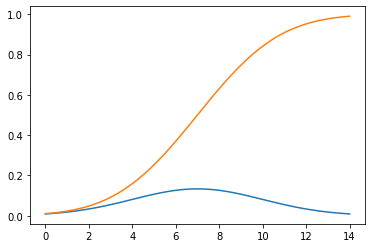

In [25]:
nd = st.norm(7, 3)
x = np.linspace(0, 14, 100)
y = nd.pdf(x)
z = nd.cdf(x)
plt.plot(x, y)
plt.plot(x, z)

In [26]:
data = nd.rvs(100)
data[:3]
np.mean(data)
st.sem(data)

array([6.38587702, 8.43683001, 5.44168385])

7.100843164626591

0.31208976207563466

In [35]:
checkVal = 6.5

In [30]:
t, tProb = st.ttest_1samp(data, checkVal)
t
tProb

1.9252254884316808

0.05707107880872914

In [36]:
mmean = np.mean(data)
mmean
mstd = np.std(data, ddof=1)
mstd
normProb = st.norm.cdf(checkVal, loc=mmean,
        scale=mstd/np.sqrt(len(data)))*2

normProb

7.100843164626591

3.1208976207563466

0.05420115469007144

In [49]:
tavl = (6.5 - 7.1) / st.sem(data,ddof=1)
tavl

-1.9225238149740722

In [50]:
td = st.t(len(data) - 1)
td.cdf(tavl) * 2

0.057414194513175094

In [51]:
nd_ = st.norm()
nd_.cdf(tavl) * 2

0.05453987993447378

In [55]:
st.sem(data,ddof=1)
np.std(data) / (99 ** (1/2))

0.31208976207563466

0.3120897620756347

# wilcoxon符号秩和检验

In [56]:
data = np.loadtxt('./ISP/Code_Quantlets/08_TestsMeanValues/oneGroup/altman_91.txt')
data

array([5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515.,
       8230., 8770.])

In [59]:
td = st.t(len(data) - 1)
t_ = (np.mean(data) - 7725)/ (np.std(data) / ((len(data) - 1)) ** (1 / 2))
t_

-2.82075406083102

In [61]:
td.cdf(t_) * 2

0.01813723517610578

In [63]:
st.wilcoxon(data - 7725)

WilcoxonResult(statistic=8.0, pvalue=0.026157182329284684)

In [66]:
from scipy import stats
myMean = np.mean(data)
mySD = np.std(data, ddof=1)     # sample standard deviation
print(('Mean and SD: {0:4.2f} and {1:4.2f}'.format(myMean, mySD)))

# Confidence intervals
tf = stats.t(len(data)-1)
# multiplication with np.array[-1,1] is a neat trick to implement "+/-"
ci = np.mean(data) + stats.sem(data)*np.array([-1,1])*tf.ppf(0.975)
print(('The confidence intervals are {0:4.2f} to {1:4.2f}.'.format(ci[0], ci[1])))

# Check if there is a significant difference relative to "checkValue"
checkValue = 7725
# --- >>> START stats <<< ---
t, prob = stats.ttest_1samp(data, checkValue)
if prob < 0.05:
    print(('{0:4.2f} is significantly different from the mean (p={1:5.3f}).'.format(checkValue, prob)))

# For not normally distributed data, use the Wilcoxon signed rank sum test
(rank, pVal) = stats.wilcoxon(data-checkValue)
(rank, pVal)
if pVal < 0.05:
  issignificant = 'unlikely'
else:
  issignificant = 'likely'
# --- >>> STOP stats <<< ---

print(('It is ' + issignificant + ' that the value is {0:d}'.format(checkValue)))

Mean and SD: 6753.64 and 1142.12
The confidence intervals are 5986.35 to 7520.93.
7725.00 is significantly different from the mean (p=0.018).


(8.0, 0.026157182329284684)

It is unlikely that the value is 7725


# 配对t检验

In [95]:
np.random.seed(1234)
data = np.random.randn(10) + 0.1
data
data1 = np.random.randn(10) * 5
data1
data2 = data + data1
data2

array([ 0.57143516, -1.09097569,  1.53270697, -0.2126519 , -0.62058873,
        0.98716294,  0.95958841, -0.5365235 ,  0.11569637, -2.14268495])

array([  5.75017862,   4.95973011,   4.76662064, -10.1062741 ,
        -1.67038683,   0.01059182,   2.02726706,   1.4454597 ,
         6.60579096,  -7.73452777])

array([  6.32161379,   3.86875442,   6.29932761, -10.318926  ,
        -2.29097556,   0.99775476,   2.98685547,   0.9089362 ,
         6.72148733,  -9.87721272])

In [98]:
t = st.t(len(data) - 1)
tval = np.mean(data) / (np.std(data, ddof=1) / len(data) ** (1 / 2))
tval
t.cdf(tval) * 2

-0.12458492298731402

0.9035904508547085

In [100]:
t = st.t(len(data) - 1)
data_ = data2 - data1
tval = np.mean(data_) / (np.std(data_, ddof=1) / len(data_) ** (1 / 2))
tval
t.cdf(tval) * 2

-0.1245849229873135

0.9035904508547089

# 独立组别之间的t检验

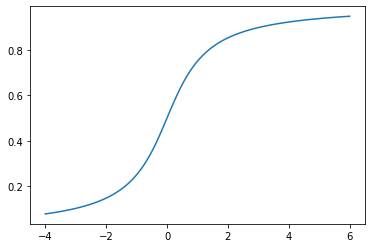

In [115]:
x = np.linspace(-4, 6, 100)
y = td.cdf(x)
plt.plot(x, y)

In [105]:
data = np.loadtxt('./ISP/Code_Quantlets/08_TestsMeanValues/twoGroups/altman_94.txt',delimiter=',')
data[:3]

array([[9.21, 0.  ],
       [7.53, 1.  ],
       [7.48, 1.  ]])

In [118]:
group1 = data[data[:, 1] == 0][:, 0]
group1.shape
group2 = data[data[:, 1] == 1][:, 0]
group2.shape

(9,)

(13,)

In [132]:
g1_mean = np.mean(group1)
g1_var = np.var(group1, ddof=1)
g1_n = len(group1)
g2_mean = np.mean(group2)
g2_var = np.var(group2, ddof=1)
g2_n = len(group2)
g1_n, g1_mean, g1_var
g2_n, g2_mean, g2_var


(9, 10.297777777777776, 1.954044444444444)

(13, 8.066153846153847, 1.5328423076923077)

In [128]:
t_statistic, p_value = st.ttest_ind(group1, group2)
t_statistic, p_value

(3.9455649161549835, 0.0007989982111700593)